In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/lstm_imdb.ipynb' '/content/drive/MyDrive/Tutorial_Deep_Learning_YT/lstm_imdb.ipynb'

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import AUC
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_words = 15000

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [5]:
model = Sequential([
    Input(shape=(maxlen,)),
    Embedding(max_words, 8, embeddings_regularizer=l2(0.01)),
    Dropout(0.25),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       AUC(name='AUC_ROC', curve='ROC'),
                       AUC(name='auc_pr', curve='PR')])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.1)
                    # callbacks=[early_stopping])

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - AUC_ROC: 0.5586 - accuracy: 0.5354 - auc_pr: 0.5653 - loss: 0.9355 - val_AUC_ROC: 0.8911 - val_accuracy: 0.8068 - val_auc_pr: 0.8888 - val_loss: 0.5082
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - AUC_ROC: 0.9082 - accuracy: 0.8328 - auc_pr: 0.9073 - loss: 0.4817 - val_AUC_ROC: 0.9261 - val_accuracy: 0.8288 - val_auc_pr: 0.9257 - val_loss: 0.4761
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - AUC_ROC: 0.9398 - accuracy: 0.8709 - auc_pr: 0.9396 - loss: 0.4190 - val_AUC_ROC: 0.9381 - val_accuracy: 0.8612 - val_auc_pr: 0.9371 - val_loss: 0.4369
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - AUC_ROC: 0.9491 - accuracy: 0.8818 - auc_pr: 0.9465 - loss: 0.3978 - val_AUC_ROC: 0.9406 - val_accuracy: 0.8708 - val_auc_pr: 0.9395 - val_loss: 0.4162
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - AUC_ROC: 0.9554 - accuracy: 0.8927 - auc_pr: 0.9549 - loss: 0.3798 - val_AUC_ROC: 0.9396 - val_accuracy: 0.8636 - va

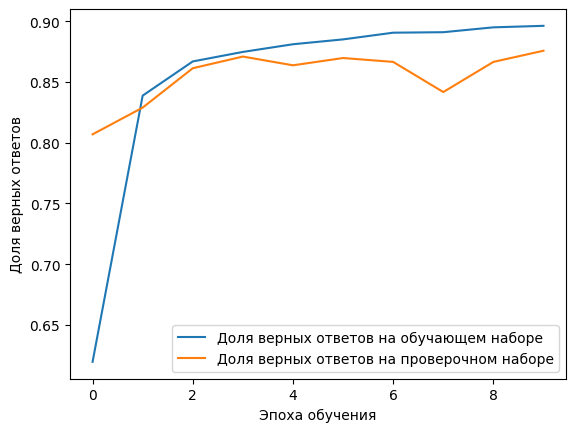

In [8]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [9]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC_ROC: 0.9435 - accuracy: 0.8711 - auc_pr: 0.9391 - loss: 0.4242
